In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #modern plotting
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('https://personal.utdallas.edu/~pxn210006/smoking.csv')

In [ ]:
# renaming columns
df.rename(columns={'height(cm)':'height', 'weight(kg)':'weight','waist(cm)':'waist',
                        'eyesight(left)':'eyesight_left', 'eyesight(right)':'eyesight_right',
                        'hearing(left)':'hearing_left', 'hearing(right)':'hearing_right',
                        'fasting blood sugar':'fasting_blood_sugar',  'Cholesterol':'cholesterol',
                        'HDL':'hdl','LDL':'ldl','Urine protein':'urine_protein',
                        'serum creatinine':'serum_creatinine', 'AST':'ast','ALT':'alt',
                        'Gtp':'gtp', 'dental caries' : 'dental_caries'}, inplace=True)

In [ ]:
df['gender'] = df['gender'].str.replace('F','0')
df['gender'] = df['gender'].str.replace('M','1')
df['gender'] = pd.to_numeric(df['gender'])

df['tartar'] = df['tartar'].str.replace('N','0')
df['tartar'] = df['tartar'].str.replace('Y','1')
df['tartar'] = pd.to_numeric(df['tartar'])

df['oral'] = df['oral'].str.replace('N','0')
df['oral'] = df['oral'].str.replace('Y','1')
df['oral'] = pd.to_numeric(df['oral'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  int64  
 2   age                  55692 non-null  int64  
 3   height               55692 non-null  int64  
 4   weight               55692 non-null  int64  
 5   waist                55692 non-null  float64
 6   eyesight_left        55692 non-null  float64
 7   eyesight_right       55692 non-null  float64
 8   hearing_left         55692 non-null  float64
 9   hearing_right        55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting_blood_sugar  55692 non-null  float64
 13  cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  hdl                  55692 non-null 

In [ ]:
#cleaning data by observation
df = df.drop(['ID'], axis=1)

In [ ]:
df.head()

,gender,age,height,weight,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,1,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,1,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,1,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,1,0,0,0


In [ ]:
# checking null values
df.isnull().sum()

gender                 0
age                    0
height                 0
weight                 0
waist                  0
eyesight_left          0
eyesight_right         0
hearing_left           0
hearing_right          0
systolic               0
relaxation             0
fasting_blood_sugar    0
cholesterol            0
triglyceride           0
hdl                    0
ldl                    0
hemoglobin             0
urine_protein          0
serum_creatinine       0
ast                    0
alt                    0
gtp                    0
oral                   0
dental_caries          0
tartar                 0
smoking                0
dtype: int64

In [ ]:
#checking NaN values
df.isna().sum()

gender                 0
age                    0
height                 0
weight                 0
waist                  0
eyesight_left          0
eyesight_right         0
hearing_left           0
hearing_right          0
systolic               0
relaxation             0
fasting_blood_sugar    0
cholesterol            0
triglyceride           0
hdl                    0
ldl                    0
hemoglobin             0
urine_protein          0
serum_creatinine       0
ast                    0
alt                    0
gtp                    0
oral                   0
dental_caries          0
tartar                 0
smoking                0
dtype: int64

In [ ]:
# removing oral column due to skewed data
df = df.drop("oral", axis='columns')

In [ ]:
#normalization
def normalize_df(df):
  for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
  return df

In [ ]:
y = df['smoking']
x = df.drop("smoking", axis='columns')
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)
len(x_train)

44553

In [ ]:
df_new = x_train.join(y_train)
len(df_new)

44553

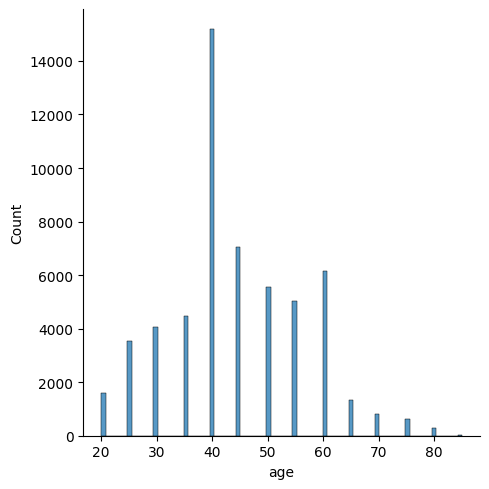

In [ ]:
# Checking Target value distribution - trying to figure our the demarcations on the basis of age group for creating base models for federated learning
sns.displot(df['age'])

In [ ]:
df = normalize_df(df_new)

gender                    Axes(0.125,0.747241;0.110714x0.132759)
age                    Axes(0.257857,0.747241;0.110714x0.132759)
height                 Axes(0.390714,0.747241;0.110714x0.132759)
weight                 Axes(0.523571,0.747241;0.110714x0.132759)
waist                  Axes(0.656429,0.747241;0.110714x0.132759)
eyesight_left          Axes(0.789286,0.747241;0.110714x0.132759)
eyesight_right            Axes(0.125,0.587931;0.110714x0.132759)
hearing_left           Axes(0.257857,0.587931;0.110714x0.132759)
hearing_right          Axes(0.390714,0.587931;0.110714x0.132759)
systolic               Axes(0.523571,0.587931;0.110714x0.132759)
relaxation             Axes(0.656429,0.587931;0.110714x0.132759)
fasting_blood_sugar    Axes(0.789286,0.587931;0.110714x0.132759)
cholesterol               Axes(0.125,0.428621;0.110714x0.132759)
triglyceride           Axes(0.257857,0.428621;0.110714x0.132759)
hdl                    Axes(0.390714,0.428621;0.110714x0.132759)
ldl                    Ax

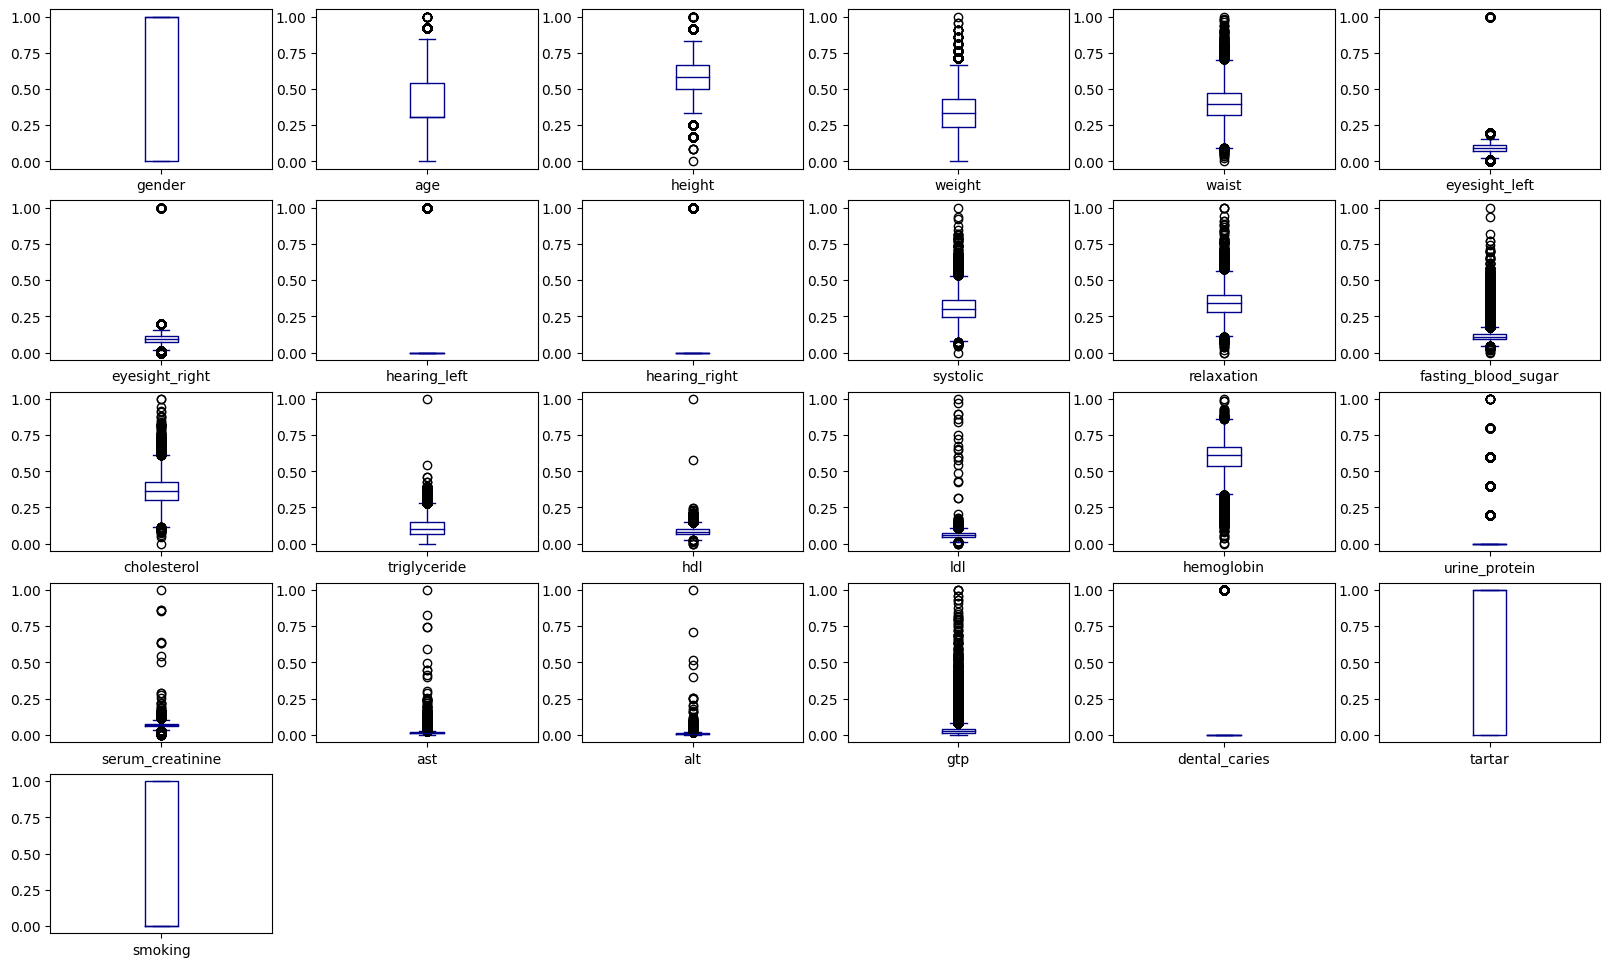

In [ ]:
# Box plot for feature selection
df.plot.box(color='DarkBlue', figsize=(20,12), subplots=True, layout=(5,6))

In [ ]:
len(df)

44553

In [ ]:
from collections import Counter
def outlier_detection(df, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_point = 1.5 * IQR
        rows.extend(df[(df[col] < Q1 - outlier_point)|(df[col] > Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n: will_drop_train.append(r)
    return will_drop_train

will_drop_train = outlier_detection(df, 3, df.select_dtypes(["float", "int"]).columns)

In [ ]:
df.drop(will_drop_train, inplace = True, axis = 0)

In [ ]:
len(df)

40905

gender                    Axes(0.125,0.747241;0.110714x0.132759)
age                    Axes(0.257857,0.747241;0.110714x0.132759)
height                 Axes(0.390714,0.747241;0.110714x0.132759)
weight                 Axes(0.523571,0.747241;0.110714x0.132759)
waist                  Axes(0.656429,0.747241;0.110714x0.132759)
eyesight_left          Axes(0.789286,0.747241;0.110714x0.132759)
eyesight_right            Axes(0.125,0.587931;0.110714x0.132759)
hearing_left           Axes(0.257857,0.587931;0.110714x0.132759)
hearing_right          Axes(0.390714,0.587931;0.110714x0.132759)
systolic               Axes(0.523571,0.587931;0.110714x0.132759)
relaxation             Axes(0.656429,0.587931;0.110714x0.132759)
fasting_blood_sugar    Axes(0.789286,0.587931;0.110714x0.132759)
cholesterol               Axes(0.125,0.428621;0.110714x0.132759)
triglyceride           Axes(0.257857,0.428621;0.110714x0.132759)
hdl                    Axes(0.390714,0.428621;0.110714x0.132759)
ldl                    Ax

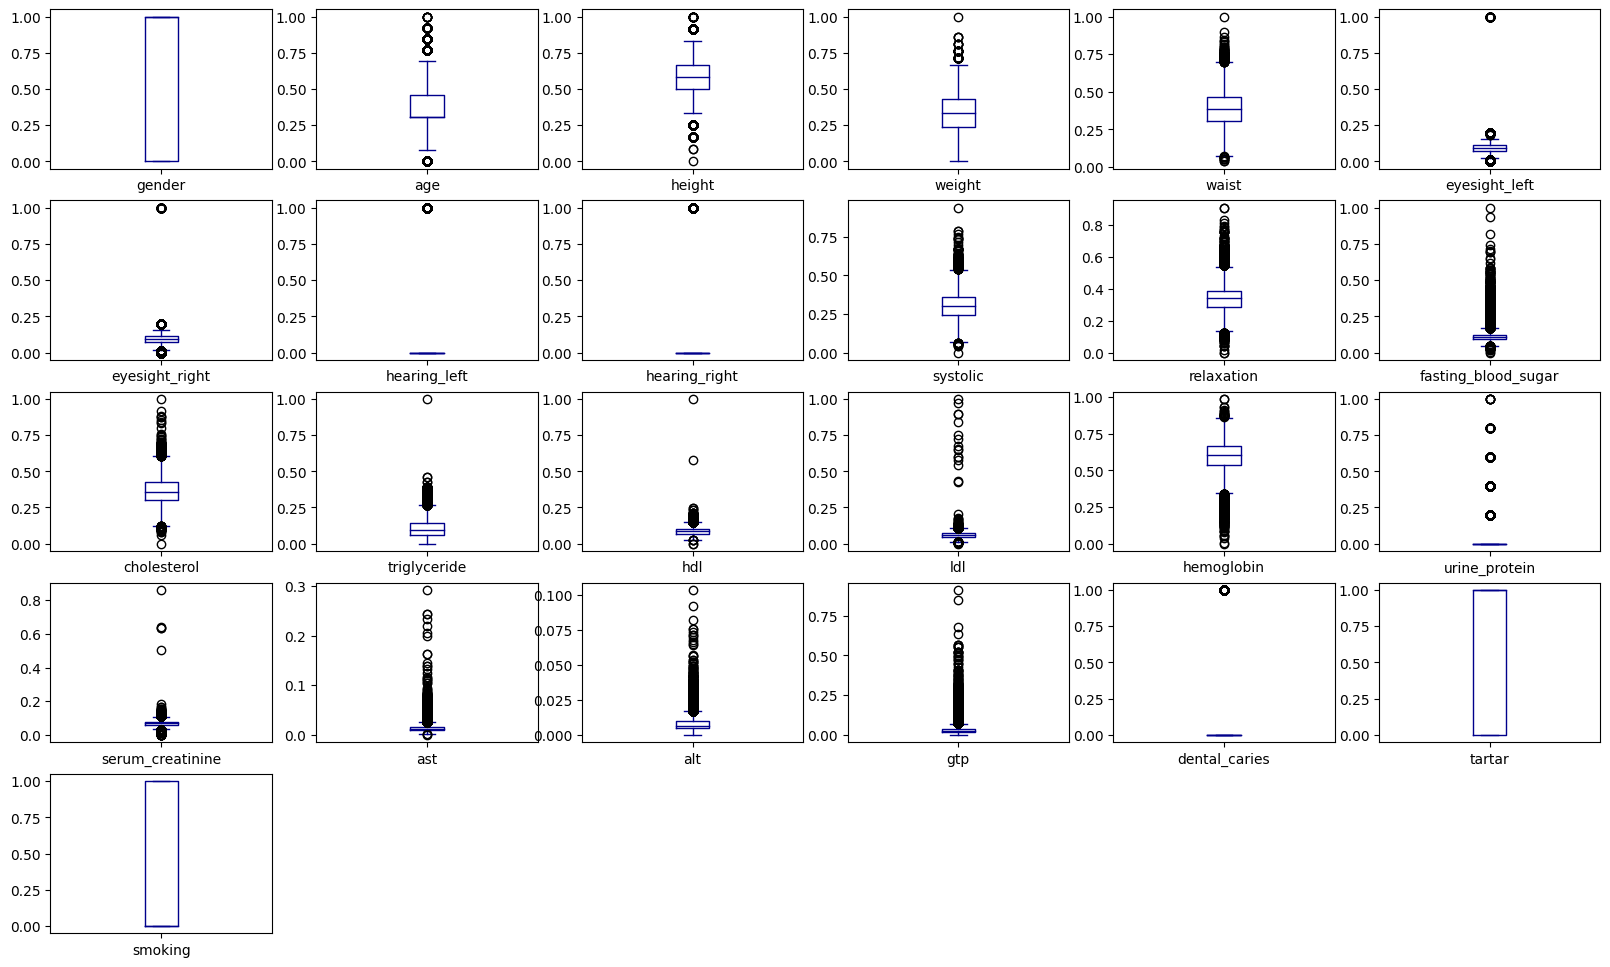

In [ ]:
# Box plot for feature selection
df.plot.box(color='DarkBlue', figsize=(20,12), subplots=True, layout=(5,6))

In [ ]:
# Correlation matrix for data
correlation_matrix = df.corr().round(2)
correlation_matrix

,gender,age,height,weight,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
gender,1.00,-0.30,0.74,0.58,0.42,0.13,0.13,-0.00,-0.01,0.15,...,-0.04,0.71,-0.00,0.56,0.12,0.28,0.27,0.08,0.05,0.51
age,-0.30,1.00,-0.48,-0.32,-0.02,-0.22,-0.20,0.14,0.14,0.13,...,0.06,-0.26,0.01,-0.13,0.08,-0.09,0.00,-0.12,-0.07,-0.16
height,0.74,-0.48,1.00,0.68,0.38,0.16,0.16,-0.05,-0.05,0.07,...,-0.06,0.54,-0.00,0.43,0.04,0.21,0.17,0.08,0.05,0.40
weight,0.58,-0.32,0.68,1.00,0.81,0.11,0.11,-0.03,-0.04,0.26,...,0.03,0.49,0.01,0.36,0.12,0.38,0.25,0.06,0.05,0.30
waist,0.42,-0.02,0.38,0.81,1.00,0.02,0.03,0.01,0.00,0.30,...,0.07,0.38,0.01,0.25,0.16,0.38,0.28,0.02,0.04,0.22
eyesight_left,0.13,-0.22,0.16,0.11,0.02,1.00,0.38,-0.04,-0.04,-0.03,...,-0.01,0.10,-0.01,0.07,-0.01,0.04,0.02,0.01,0.01,0.06
eyesight_right,0.13,-0.20,0.16,0.11,0.03,0.38,1.00,-0.03,-0.03,-0.01,...,-0.01,0.10,-0.01,0.05,-0.00,0.05,0.03,0.01,0.01,0.07
hearing_left,-0.00,0.14,-0.05,-0.03,0.01,-0.04,-0.03,1.00,0.35,0.02,...,-0.01,-0.01,-0.02,-0.00,0.01,-0.02,-0.02,-0.04,-0.03,-0.02
hearing_right,-0.01,0.14,-0.05,-0.04,0.00,-0.04,-0.03,0.35,1.00,0.02,...,-0.00,-0.02,-0.01,-0.00,0.00,-0.03,-0.01,-0.04,-0.02,-0.01
systolic,0.15,0.13,0.07,0.26,0.30,-0.03,-0.01,0.02,0.02,1.00,...,0.01,0.18,0.01,0.06,0.09,0.13,0.15,0.01,-0.00,0.06


<Axes: >

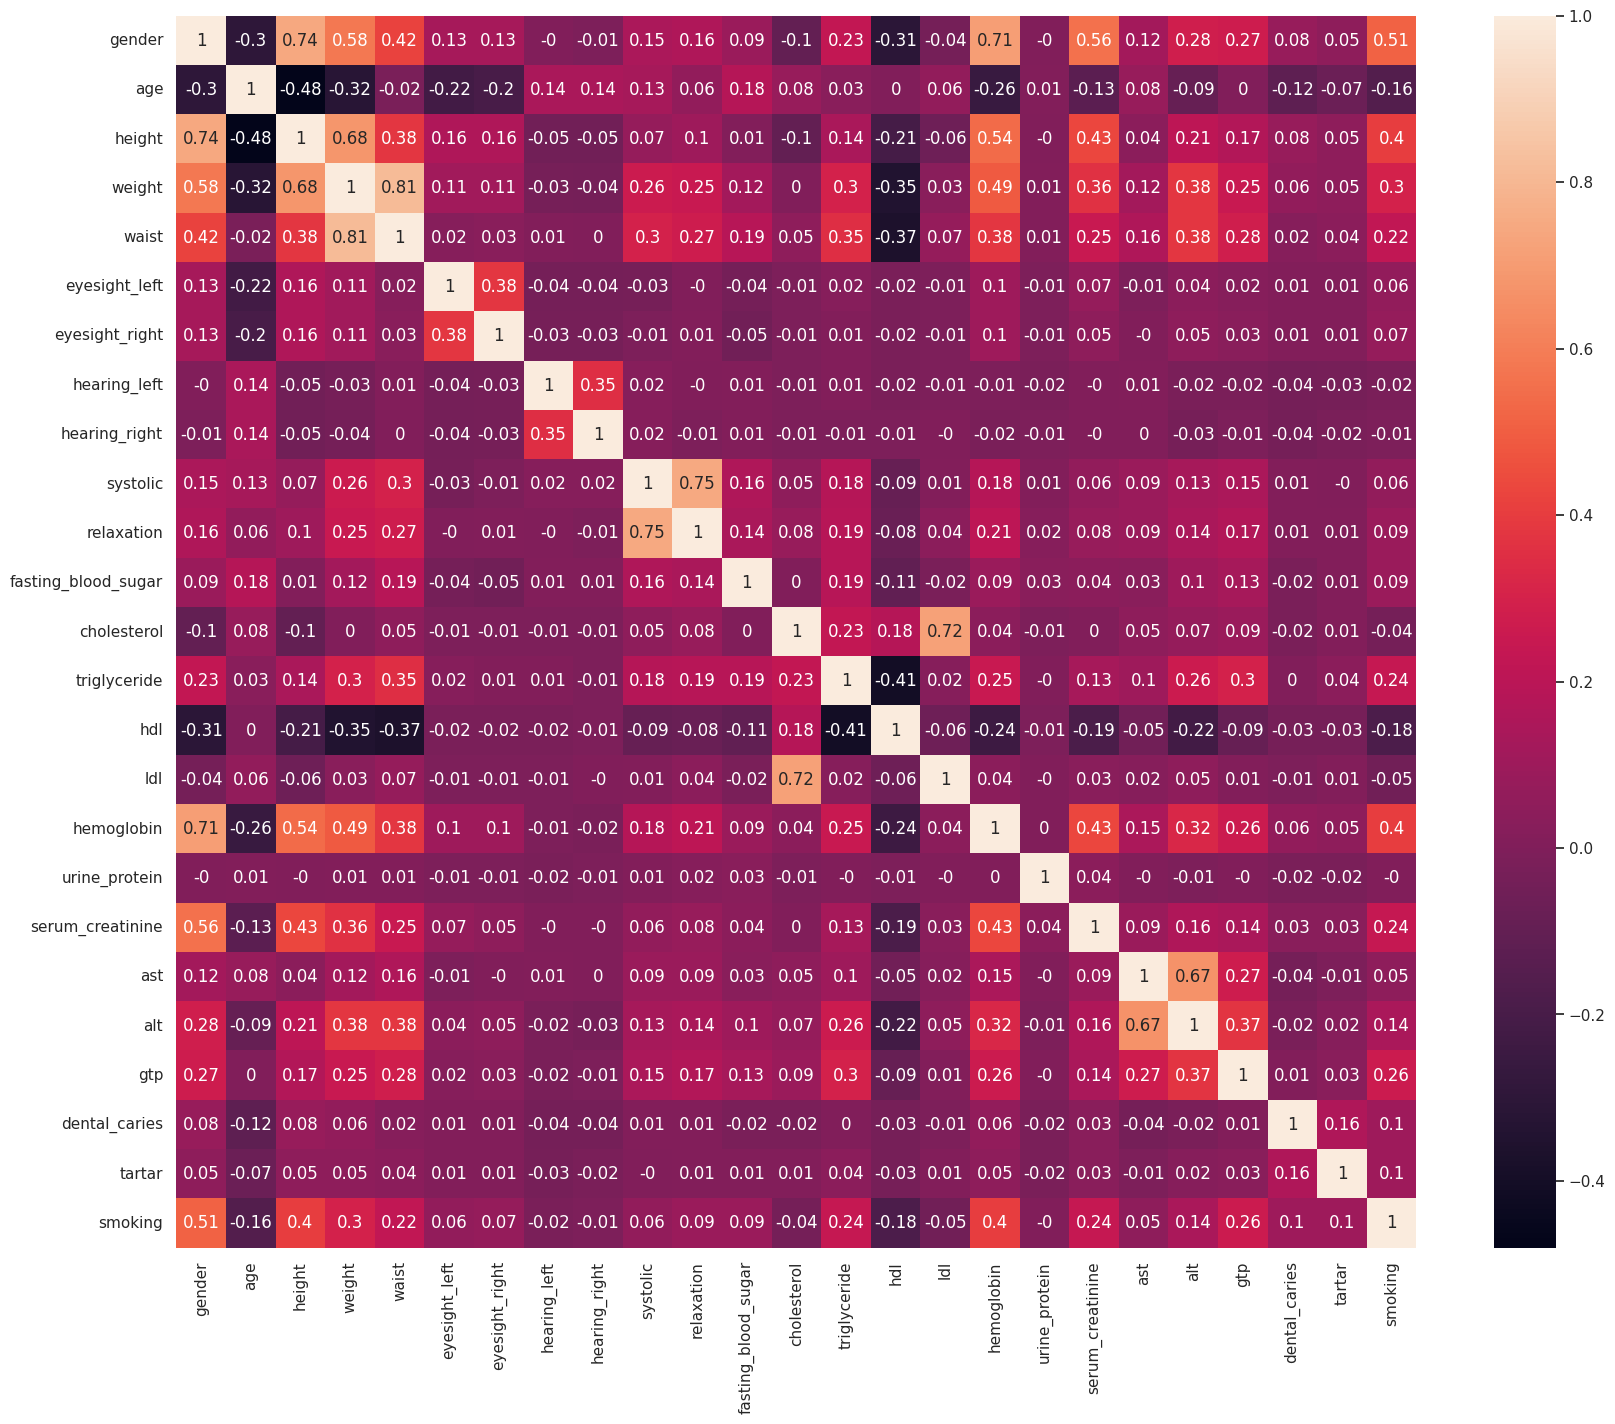

In [ ]:
# Heatmap for feature selection from df
sns.set(rc={'figure.figsize':(20,16)})
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# take a sample from original dataset, here we are selecting 10% of dataset
df_sample = df.sample(frac=1)

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40905 entries, 20634 to 50779
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               40905 non-null  float64
 1   age                  40905 non-null  float64
 2   height               40905 non-null  float64
 3   weight               40905 non-null  float64
 4   waist                40905 non-null  float64
 5   eyesight_left        40905 non-null  float64
 6   eyesight_right       40905 non-null  float64
 7   hearing_left         40905 non-null  float64
 8   hearing_right        40905 non-null  float64
 9   systolic             40905 non-null  float64
 10  relaxation           40905 non-null  float64
 11  fasting_blood_sugar  40905 non-null  float64
 12  cholesterol          40905 non-null  float64
 13  triglyceride         40905 non-null  float64
 14  hdl                  40905 non-null  float64
 15  ldl                  40905 non-n

In [ ]:
# features = ['age','height','weight','waist','triglyceride','hemoglobin','serum_creatinine','gtp','relaxation','tartar','hdl','dental_caries']
# x = df_sample[features]
# y = df_sample['smoking']

y = df['smoking']
x = df.drop(['smoking','urine_protein', 'ast', 'cholesterol', 'fasting_blood_sugar', 'eyesight_left', 'eyesight_right', 'hearing_left', 'hearing_right', 'relaxation', 'systolic'], axis='columns')

x.shape, y.shape

((40905, 14), (40905,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
lr = LogisticRegression(warm_start=True, max_iter=200)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=200, warm_start=True)

In [ ]:
x_train_prediction = lr.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Training data accuracy: ',training_data_accuracy)
print('Test data accuracy: ',lr.score(x_test, y_test))

Training data accuracy:  0.7416574990832416
Test data accuracy:  0.7512529030680846


In [ ]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(lr, filename)

['finalized_model.sav']

In [ ]:
loaded_model = joblib.load(filename)

# Encryption

In [ ]:
!pip install cryptography

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Generating a key
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
private_key = rsa.generate_private_key(
    public_exponent=65537,
    key_size=2048,
    backend=default_backend()
)
public_key = private_key.public_key()

In [ ]:
# Storing the keys
from cryptography.hazmat.primitives import serialization

pem_private = private_key.private_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PrivateFormat.PKCS8,
    encryption_algorithm=serialization.NoEncryption()
)

with open('private_key.pem', 'wb') as f:
    f.write(pem_private)

pem_public = public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
)

with open('public_key.pem', 'wb') as f:
    f.write(pem_public)

In [ ]:
# Reading the keys back in (for demonstration purposes)
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import serialization

with open("private_key.pem", "rb") as key_file:
    private_key = serialization.load_pem_private_key(
        key_file.read(),
        password=None,
        backend=default_backend()
    )

with open("public_key.pem", "rb") as key_file:
    public_key = serialization.load_pem_public_key(
        key_file.read(),
        backend=default_backend()
    )

In [ ]:
import pickle

In [ ]:
# create pickle of the model
filename = 'pretrained_model'
pickle.dump(lr,open(filename,'wb'))

In [ ]:
# Encrypting the model
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import padding

output = open('pretrained_encrypted_model', 'ab')

with open('pretrained_model', 'rb') as input:
  while True:
    msg = input.read(100)

    if not msg:
      break

    encrypted = public_key.encrypt(
        msg,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )

    output.write(encrypted)

output.close()

In [ ]:
# Decrypting the model
input = open('pretrained_decrypted_model', 'ab')

with open('pretrained_encrypted_model', 'rb') as output:
  while True:
    encrypt = output.read(256)

    if not encrypt:
      break

    original_message = private_key.decrypt(
        encrypt,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )

    input.write(original_message)

input.close()

In [ ]:
# get orginal model back
pretrained_model = pickle.load(open('pretrained_decrypted_model', 'rb'))

In [ ]:
# check if result remains the same
x_train_prediction = pretrained_model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Training data accuracy: ',training_data_accuracy)

Training data accuracy:  0.7292929292929293


In [ ]:
pretrained_model.score(x_test, y_test)

0.7190305206463196

# Docker Model

array([[<Axes: title={'center': 'age'}>]], dtype=object)

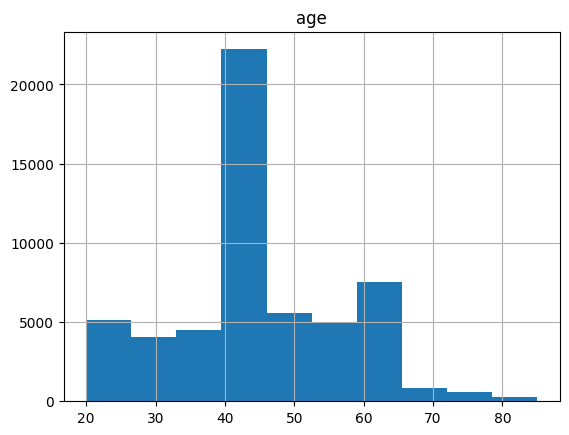

In [ ]:
df.hist(column='age')

In [ ]:
# split dataset into age groups
df_age_20_30 = df[(df['age'] >= 20) & (df['age'] < 30)]
df_age_30_40 = df[(df['age'] >= 30) & (df['age'] < 40)]
df_age_40_50 = df[(df['age'] >= 40) & (df['age'] < 50)]
df_age_50_60 = df[(df['age'] >= 50) & (df['age'] < 60)]
df_age_60_70 = df[(df['age'] >= 60) & (df['age'] < 70)]

In [ ]:
print('Dataset size for age 20-30', df_age_20_30.shape)
print('Dataset size for age 30-40', df_age_30_40.shape)
print('Dataset size for age 40-50', df_age_40_50.shape)
print('Dataset size for age 50-60', df_age_50_60.shape)
print('Dataset size for age 60-70', df_age_60_70.shape)

Dataset size for age 20-30 (5130, 27)
Dataset size for age 30-40 (8536, 27)
Dataset size for age 40-50 (22218, 27)
Dataset size for age 50-60 (10569, 27)
Dataset size for age 60-70 (7503, 27)


In [ ]:
features = ['gender','age','height','weight','waist','eyesight_left','eyesight_right','hearing_left','hearing_right','systolic','relaxation','fasting_blood_sugar','cholesterol','triglyceride','hdl','ldl','hemoglobin','urine_protein','serum_creatinine','ast','alt','gtp','oral','dental_caries','tartar']
x1 = df_age_20_30[features]
y1 = df_age_20_30['smoking']
x1.shape, y1.shape

((5130, 25), (5130,))

In [ ]:
# docker container will run model for each age group
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, stratify=y1, random_state=2)
pretrained_model.fit(x1_train, y1_train)
pretrained_model.score(x1_test, y1_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6042884990253411